In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("blackFridaySaleData.csv")

In [3]:
df.count()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1            550068
Product_Category_2            376430
Product_Category_3            166821
Purchase                      550068
dtype: int64

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
dfCopy = df.copy()

In [6]:
df.shape

(550068, 12)

In [7]:
print("Total unique products are:", len(df['Product_ID'].value_counts()))

Total unique products are: 3631


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [10]:
# drop unwanted column
df.drop(['User_ID'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
# To get only name of the columns having null/Missing values with its count

null_columns=df.columns[df.isnull().any()]
print("Missing values columns are : ", null_columns)

# To get the count of null/Missing values
print("Column Name   Missing value")
df[null_columns].isnull().sum()




Missing values columns are :  Index(['Product_Category_2', 'Product_Category_3'], dtype='object')
Column Name   Missing value


Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [13]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b3904eed0>,
      dtype=object)

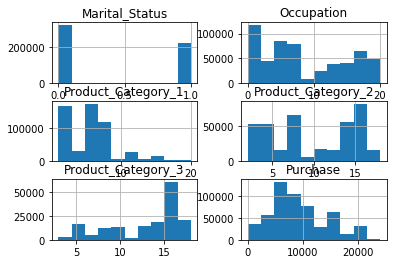

In [14]:
df.hist()

In [15]:
sorted(df['Age'].unique().tolist())

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [16]:
sorted(df['Occupation'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [17]:
sorted(df['City_Category'].unique().tolist())

['A', 'B', 'C']

In [18]:
sorted(df['Marital_Status'].unique().tolist())

[0, 1]

In [19]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [20]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [21]:
# 0- unmarried , 1- married
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [22]:
df.City_Category.value_counts()


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [23]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [24]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

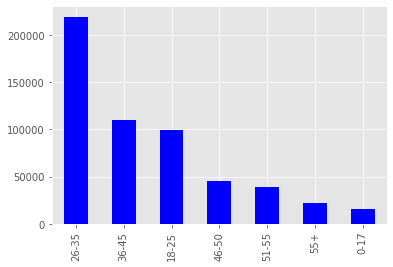

In [25]:
plt.style.use('ggplot')
age = df.Age.value_counts()

age.plot.bar(color = 'b')
plt.xlable  = ('Age groups')
plt.ylabel = ('Product Sold')

In [26]:
df.groupby(['Purchase', 'Age']).size()

Purchase  Age  
12        0-17      3
          18-25    20
          26-35    29
          36-45    23
          46-50    12
                   ..
23960     36-45     1
          46-50     1
          51-55     1
          55+       1
23961     26-35     3
Length: 82796, dtype: int64

In [27]:
df.Purchase.value_counts()

7011     191
7193     188
6855     187
6891     184
6960     183
        ... 
15105      1
14384      1
10453      1
8537       1
14640      1
Name: Purchase, Length: 18105, dtype: int64

In [28]:
df.groupby(by=["Age"]).sum()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,
0-17,132309,0,76775,96155.0,57725.0,134913183
18-25,671348,21116,509371,654936.0,388041.0,913848675
26-35,1734073,86291,1166945,1473278.0,846624.0,2031770578
36-45,972225,43636,604438,750081.0,424412.0,1026569884
46-50,389239,33011,262424,315572.0,173059.0,420843403
51-55,339198,27662,222313,267570.0,146334.0,367099644
55+,204346,13621,130450,147356.0,77134.0,200767375


In [29]:
df.groupby(by=['Age']).sum()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,
0-17,132309,0,76775,96155.0,57725.0,134913183
18-25,671348,21116,509371,654936.0,388041.0,913848675
26-35,1734073,86291,1166945,1473278.0,846624.0,2031770578
36-45,972225,43636,604438,750081.0,424412.0,1026569884
46-50,389239,33011,262424,315572.0,173059.0,420843403
51-55,339198,27662,222313,267570.0,146334.0,367099644
55+,204346,13621,130450,147356.0,77134.0,200767375


In [30]:
df.groupby(by=['Occupation']).sum()

,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,,,,,
0,29149,378374,464793.0,263929.0,635406958
1,22702,269249,319095.0,172085.0,424614144
2,12282,150096,176408.0,95243.0,238028583
3,7286,98740,119452.0,63335.0,162002168
4,19532,375044,478959.0,279431.0,666244484
5,4569,62643,80713.0,48775.0,113649759
6,9165,114201,135849.0,73840.0,188416784
7,25730,320171,402950.0,228545.0,557371587
8,855,7237,10315.0,6756.0,14737388


In [31]:
df[['Age', 'Purchase']].groupby(by='Age').sum()

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


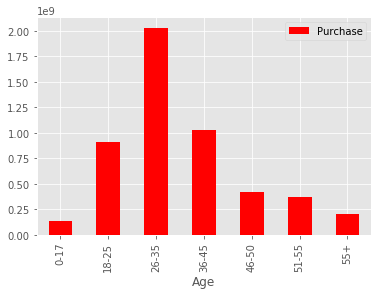

In [32]:
# purchase by age group
agePurchaseGraph = df[['Age', 'Purchase']].groupby(by='Age').sum()
agePurchaseGraph.plot.bar(color= 'r')
plt.xlabel = ('Age group')
plt.ylabel = ('Purchase')

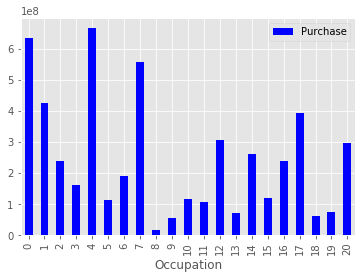

In [33]:
# occupation vs purchase
occupationPurchaseGraph = df[['Occupation', 'Purchase']].groupby(by='Occupation').sum()
occupationPurchaseGraph.plot.bar(color = 'b')
plt.xlable  = ('Occupation')
plt.ylabel = ('Purchase')

In [34]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [35]:
# purchase by city
df[['City_Category', 'Purchase']].groupby(by='City_Category').sum()

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


In [36]:
# Changing name of the columns
df.columns = ['Product_ID', 'Gender', 'Age', 'Occupation', 'CityCategory',
       'StayInYears', 'MaritalStatus', 'ProductCategory_1',
       'ProductCategory_2', 'ProductCategory_3', 'Purchase']

In [37]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'CityCategory',
       'StayInYears', 'MaritalStatus', 'ProductCategory_1',
       'ProductCategory_2', 'ProductCategory_3', 'Purchase'],
      dtype='object')

In [38]:
# Convert categorical data into integer using map function (e.g 'Gender' column)
dict_map = {'F': 0,'M': 1}
updateGender = df['Gender'].map(dict_map)
df['Gender'] = updateGender


In [39]:
df.Gender.value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

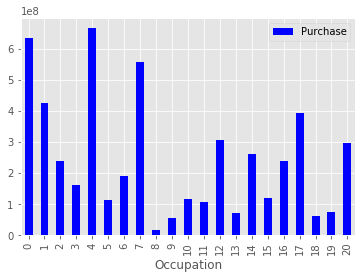

In [40]:
occupationPurchaseGraph = df[['Occupation', 'Purchase']].groupby(by='Occupation').sum()
occupationPurchaseGraph.plot.bar(color = 'b')
plt.xlable  = ('Occupation')
plt.ylabel = ('Purchase')

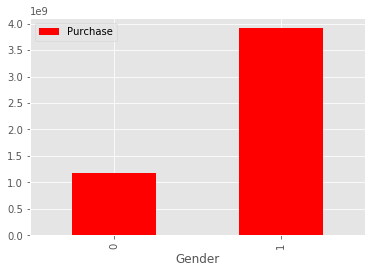

In [41]:
genderPurchaseGraph = df[['Gender', 'Purchase']].groupby(by='Gender').sum()
genderPurchaseGraph.plot.bar(color='r')
plt.xlable  = ('Gender')
plt.ylabel = ('Purchase')

In [42]:
df.Gender.value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

In [43]:
df.CityCategory.value_counts()

B    231173
C    171175
A    147720
Name: CityCategory, dtype: int64

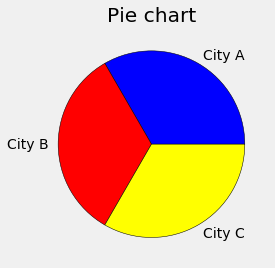

In [44]:
plt.style.use("fivethirtyeight")
slice=[len('A'),len('B'), len('C')]
label=['City A', 'City B', "City C"]
colors=["blue", "red", "yellow"]
plt.pie(slice, labels=label, colors=colors, wedgeprops={'edgecolor':'black'})

plt.title("Pie chart")
plt.show()

In [45]:
# To get only name of the columns having null/Missing values with its count

null_columns=df.columns[df.isnull().any()]
print("Missing values columns are : ", null_columns)

# To get the count of null/Missing values
print("Column Name   Missing value")
df[null_columns].isnull().sum()

Missing values columns are :  Index(['ProductCategory_2', 'ProductCategory_3'], dtype='object')
Column Name   Missing value


ProductCategory_2    173638
ProductCategory_3    383247
dtype: int64

In [46]:
df.dtypes

Product_ID            object
Gender                 int64
Age                   object
Occupation             int64
CityCategory          object
StayInYears           object
MaritalStatus          int64
ProductCategory_1      int64
ProductCategory_2    float64
ProductCategory_3    float64
Purchase               int64
dtype: object

In [47]:
df.ProductCategory_2.head()

0     NaN
1     6.0
2     NaN
3    14.0
4     NaN
Name: ProductCategory_2, dtype: float64

In [48]:
# returns column names having at least one missing value
df.isna().any()

Product_ID           False
Gender               False
Age                  False
Occupation           False
CityCategory         False
StayInYears          False
MaritalStatus        False
ProductCategory_1    False
ProductCategory_2     True
ProductCategory_3     True
Purchase             False
dtype: bool

In [49]:
# returns the number of missing values in each column.
df.isna().sum()

Product_ID                0
Gender                    0
Age                       0
Occupation                0
CityCategory              0
StayInYears               0
MaritalStatus             0
ProductCategory_1         0
ProductCategory_2    173638
ProductCategory_3    383247
Purchase                  0
dtype: int64

In [50]:
# axis = 0 - Row, axis = 1 - Column
# df. dropna (axis=0,how=' all', inplace=True) - drop row with all missing values
# df. dropna (axis=0, inplace=True) - drop row with any missing values
# df. dropna (axis=0, thresh=3, inplace=True) - drop row with 3 missing values

# Replace missing values with a scalar:
# df.fillna(25) -- replace NaN values with 25
# Replace missing value with mean , median
# mean = df[' column a' ].mean()
# df['column a'].fillna(mean)
# Using method parameter, missing values can be replaced with the values before or after them. - bfill, ffill
# df.fillna(axis=O, method=ffill)
# if there are many consecutive missing values in a column or row, you may want to limit the number of missing values to be forward or backward filled.
# df. fillna (axis=0, method=' ffill', limit=1)

In [51]:
df.dtypes

Product_ID            object
Gender                 int64
Age                   object
Occupation             int64
CityCategory          object
StayInYears           object
MaritalStatus          int64
ProductCategory_1      int64
ProductCategory_2    float64
ProductCategory_3    float64
Purchase               int64
dtype: object

In [52]:
df.ProductCategory_2.head()

0     NaN
1     6.0
2     NaN
3    14.0
4     NaN
Name: ProductCategory_2, dtype: float64

In [53]:
mean = df.ProductCategory_2.mean()
mean

9.842329251122386

In [54]:
df.isna().any().sum()

2

In [55]:
median = df.ProductCategory_2.median()
median

9.0

In [56]:
mean = df['ProductCategory_2'].mean()
df['ProductCategory_2'] = df['ProductCategory_2'].fillna(mean)


In [57]:
df.head

<bound method NDFrame.head of        Product_ID  Gender    Age  Occupation CityCategory StayInYears  \
0       P00069042       0   0-17          10            A           2   
1       P00248942       0   0-17          10            A           2   
2       P00087842       0   0-17          10            A           2   
3       P00085442       0   0-17          10            A           2   
4       P00285442       1    55+          16            C          4+   
...           ...     ...    ...         ...          ...         ...   
550063  P00372445       1  51-55          13            B           1   
550064  P00375436       0  26-35           1            C           3   
550065  P00375436       0  26-35          15            B          4+   
550066  P00375436       0    55+           1            C           2   
550067  P00371644       0  46-50           0            B          4+   

        MaritalStatus  ProductCategory_1  ProductCategory_2  \
0                   0         

In [58]:
df.isna().any().sum()

1

In [59]:
df['ProductCategory_3'].head()

0     NaN
1    14.0
2     NaN
3     NaN
4     NaN
Name: ProductCategory_3, dtype: float64

In [60]:
mean= df['ProductCategory_3'].mean()
mean
df['ProductCategory_3'] = df['ProductCategory_3'].fillna(mean)

In [61]:
df.isna().any().sum()

0

In [62]:
df.ProductCategory_2.value_counts()

9.842329     173638
8.000000      64088
14.000000     55108
2.000000      49217
16.000000     43255
15.000000     37855
5.000000      26235
4.000000      25677
6.000000      16466
11.000000     14134
17.000000     13320
13.000000     10531
9.000000       5693
12.000000      5528
10.000000      3043
3.000000       2884
18.000000      2770
7.000000        626
Name: ProductCategory_2, dtype: int64

In [63]:
df.ProductCategory_3.value_counts()

12.668243    383247
16.000000     32636
15.000000     28013
14.000000     18428
17.000000     16702
5.000000      16658
8.000000      12562
9.000000      11579
12.000000      9246
13.000000      5459
6.000000       4890
18.000000      4629
4.000000       1875
11.000000      1805
10.000000      1726
3.000000        613
Name: ProductCategory_3, dtype: int64

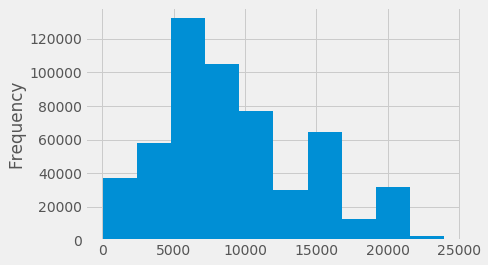

In [64]:
df['Purchase'].plot(kind='hist')

Gender
0    AxesSubplot(0.08,0.07;0.87x0.81)
1    AxesSubplot(0.08,0.07;0.87x0.81)
Name: Purchase, dtype: object

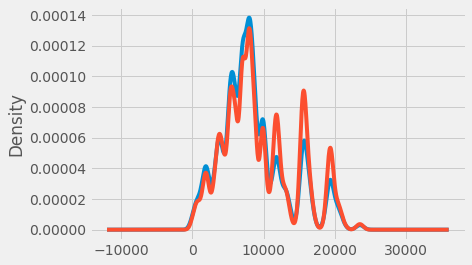

In [65]:
df.groupby('Gender')['Purchase'].plot(kind='kde')